# Prunning Methods

### Training and Testing

In [1]:
import torch 
import numpy as np
from torchvision import datasets, transforms
from neural_networks import Lenet5_Based_Model
from train import *
from prunning import *

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Runing in {device}")

Runing in cpu


In [3]:
torch.manual_seed(42)
nsamples = 50

transform = transforms.Compose([
    transforms.ToTensor() 
])

dataset1 = datasets.MNIST('../data', train=True, download=True,transform=transform)
dataset2 = datasets.MNIST('../data', train=False,transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,batch_size=nsamples, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset2,batch_size=nsamples, shuffle=True)

In [4]:
model = Lenet5_Based_Model().to(device)

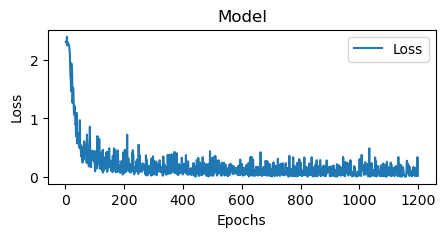

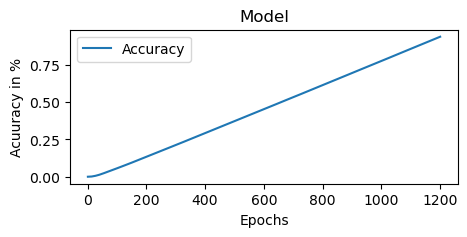

In [5]:
model_delta = model.state_dict()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)
loss_items, final_epoch, acc_items = train(model,device,train_loader,optimizer)
loss_graph(loss_items,final_epoch)
accuracy_graph(acc_items,final_epoch)

In [6]:
test(model,device,test_loader)

Test Loss: 0.0014337791147641837 
Acurracy: 0.9791


(0.0014337791147641837, 0.9791)

### Prunning 

In [7]:
mask = generate_mask(model)
print(mask)

[tensor([[[[True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True]]],


        [[[True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True]]],


        [[[True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True]]],


        [[[True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True]]],


        [[[True, True, True, True, True],
          [True, True, True, True, True],
          [True, True, True, True, True],
          [True, 

In [8]:
apply_mask(model,mask)

In [9]:
test(model,device,test_loader)

Test Loss: 0.0017154620162444189 
Acurracy: 0.9757


(0.0017154620162444189, 0.9757)

### Reseting the network and applying the mask

In [10]:
model.load_state_dict(model_delta)

<All keys matched successfully>

In [11]:
apply_mask(model,mask)

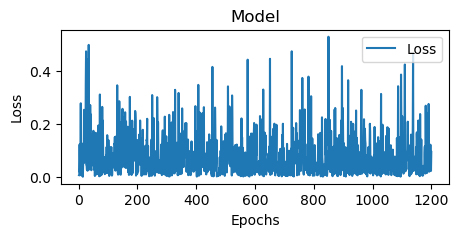

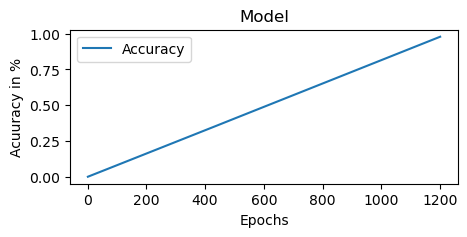

In [12]:
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)
loss_items, final_epoch, acc_items = train(model,device,train_loader,optimizer)
loss_graph(loss_items,final_epoch)
accuracy_graph(acc_items,final_epoch)

In [13]:
test(model,device,test_loader)

Test Loss: 0.0013291433815378695 
Acurracy: 0.9825


(0.0013291433815378695, 0.9825)

## Wining Tickets Hypotesis

Test Loss: 0.0008849477531941375 
Acurracy: 0.9873
Test Loss: 0.0013400220853814972 
Acurracy: 0.9848
Test Loss: 0.0010224492760098655 
Acurracy: 0.9858
Test Loss: 0.0009214472079242114 
Acurracy: 0.9867
Test Loss: 0.0010309362190288084 
Acurracy: 0.9864
Test Loss: 0.0010280051369758439 
Acurracy: 0.9867
Test Loss: 0.0009274986105821881 
Acurracy: 0.9894
Test Loss: 0.0011516735301912832 
Acurracy: 0.9885
Test Loss: 0.000973727155468805 
Acurracy: 0.9882
Test Loss: 0.0007828431987065414 
Acurracy: 0.9908
Test Loss: 0.0009935934977235092 
Acurracy: 0.989
Test Loss: 0.0011628578476173062 
Acurracy: 0.9872
Test Loss: 0.00074023942132917 
Acurracy: 0.9913
Test Loss: 0.0009136743377804577 
Acurracy: 0.9908
Test Loss: 0.0008226926299293837 
Acurracy: 0.9912
Test Loss: 0.0008599482199648321 
Acurracy: 0.9904
Test Loss: 0.0009037060837115291 
Acurracy: 0.9905
Test Loss: 0.0006531487032787026 
Acurracy: 0.9928
Test Loss: 0.0009487674349134636 
Acurracy: 0.9909
Test Loss: 0.0016335574504870011 
A

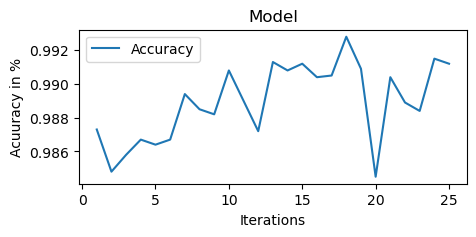

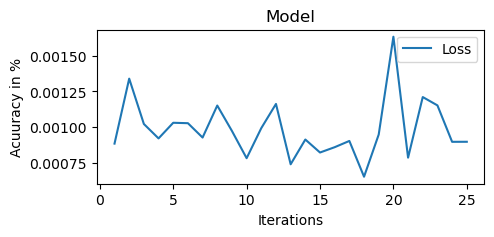

In [14]:
prunning_iterations(25,model,device,train_loader,test_loader,optimizer,model_delta)